In [2]:
import torch

# 3. Linear Regression

## 01. Linear Regression

### 1. Data definition

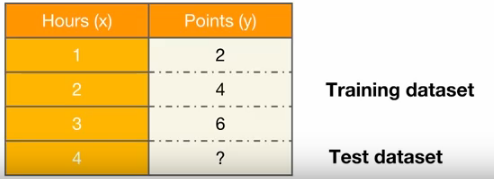

### 2. Hypothesis

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

$ H(x) = Wx + b $

- $W$ :  Weight
- $b$ : bias

### 3. Cost function

- cost function = loss function = error function = object function

- Mean Squared Error, MSE

\begin{equation}
\operatorname{cost}(W, b)=\frac{1}{n} \sum_{i=1}^{n}\left[y^{(i)}-H\left(x^{(i)}\right)\right]^{2}
\end{equation}


### 4. Gradient Descnet

- Optimizer (최적화 알고리즘)
- Gradient Descent (경사하강법)

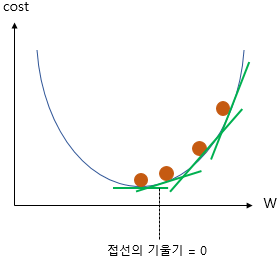

\begin{equation}
기울기 = \frac {\partial cost(W)} {\partial W}
\end{equation}

\begin{equation}
W := W - \alpha \frac {\partial} {\partial W} cost(W) 
\end{equation}

- $ \alpha $ : learning rate

### 5. PyTorch - Linear Regression

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

In [5]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 가중치 W, 편향 b 초기화(0), 학습을 통해 값이 변경되는 변수 (requires_grad=True)
W = torch.zeros(1, requires_grad=True) 
b = torch.zeros(1, requires_grad=True)

In [6]:
# Hypothesis
hypothesis = x_train * W + b

# cost function
cost = torch.mean((hypothesis - y_train) ** 2)

# optimizer lr=learning rate
optimizer = optim.SGD([W, b], lr = 0.01)

In [7]:
nb_epochs = 1999
for epochs in range(nb_epochs+1):
    
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)

    # gradient를 0으로 초기화
    optimizer.zero_grad() # pytorch는 미분을 통해 얻은 기울기를 이전에 사용된 기울기 값에 누적시크는 특징이 있음
    cost.backward() # 비용함수를 미분하여 gradient를 계산
    optimizer.step() # W, b를 업데이트
    
    if epochs % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epochs, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

## 02. Autograd (자동미분)

In [31]:
import torch

w = torch.tensor(2.0, requires_grad=True)

y = w**2
z = 2*y + 5

z.backward()

print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


## 03. Multivariable Linear Regresssion

### 1. Data definition

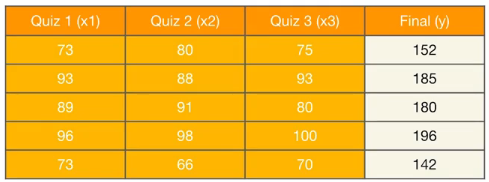

$$ H(x) = w_1x_1 + w_2x_2 + w_3x_3 + b $$

### 2. Pytorch

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079378


### 3. Dot Product

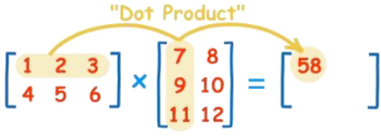


#### 1). 백터 연산으로 이해하기
$$H(X) = w_1x_1 + w_2x_2 + w_3x_3$$

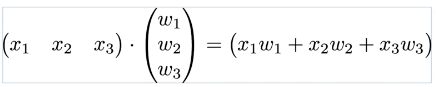

$$H(X) = XW3$$

#### 2). Matrix
$$
\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ \\
      x_{21}\ x_{22}\ x_{23}\ \\
      x_{31}\ x_{32}\ x_{33}\ \\
      x_{41}\ x_{42}\ x_{43}\ \\
      x_{51}\ x_{52}\ x_{53}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{1} \\
      w_{2} \\
      w_{3} \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b \\
      b \\
      b \\
      b \\
      b \\
    \end{array}
  \right)
 \ =
\left(
    \begin{array}{c}
      x_{11}w_{1}+ x_{12}w_{2}+ x_{13}w_{3} + b\ \\
      x_{21}w_{1}+ x_{22}w_{2}+ x_{23}w_{3} + b\ \\
      x_{31}w_{1}+ x_{32}w_{2}+ x_{33}w_{3} + b\ \\
      x_{41}w_{1}+ x_{42}w_{2}+ x_{43}w_{3} + b\ \\
      x_{51}w_{1}+ x_{52}w_{2}+ x_{53}w_{3} + b\ \\
    \end{array}
  \right)
$$
  
$$H(X) = XW + B$$

In [35]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7861,  95.8280]) Cost: 3069.590820
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

## 04. nm.Module 

### 1. 단순 선형 회귀 구현하기


In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))
        
        
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]])

# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

print(list(model.parameters()))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000
훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


### 2. 다주 선형 회귀 구현하기

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 


nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))
        

# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)    

print(list(model.parameters()))

Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210559
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206762
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204529
Epoch 1600/2000 Cost: 0.203481
Epoch 1700/2000 Cost: 0.202486
Epoch 1800/2000 Cost: 0.201539
Epoch 1900/2000 Cost: 0.200634
Epoch 2000/2000 Cost: 0.199770
훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2306]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


## 05. 클래스로 파이토치 모델 구현하기

### 1. 모델을 클라스로 구현

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])


class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): # 모델의 구조와 동작을 정의하는 생성자
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x): # 학습데이터를 입력받아서 forward연산을 진행
        return self.linear(x)


model = LinearRegressionModel()

# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))
        
        
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

print(list(model.parameters()))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000
훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])


class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)
    
model = MultivariateLinearRegressionModel()


optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

print(list(model.parameters()))

Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210559
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206762
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204529
Epoch 1600/2000 Cost: 0.203481
Epoch 1700/2000 Cost: 0.202486
Epoch 1800/2000 Cost: 0.201539
Epoch 1900/2000 Cost: 0.200634
Epoch 2000/2000 Cost: 0.199770
훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2306]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


## 06. 미니 배치와 데이터 로드(Mini Batch and Data Load)

### 1. Mini Batch and Batch Size

- Mini Batch : 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습

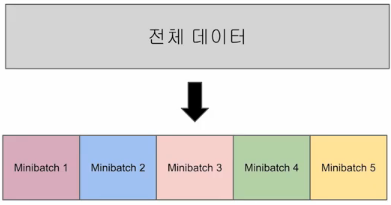


- Epoch : 전체 훈련 데이터가 학습에 한 번 사용된 주기

- Batch size : Mini batch의 크기
    - 보통 2의 제곱수를 사용 (2, 4, 8, 16...)
    - CPU, GPU 메모리가 2의 배수 -> 데이터 송수신 효율


- 배치 경사 하강법: 전체 데이터에 대하여 한번의 경사 하강법을 수행
    - 전체 데이터를 사용 
        - 가중치 값이 최적값에 수렴하는 과정이 매우 안정적
        - 많은 계산량


- 미니 배치 경사 하강법: 미니 배치 단위로 경사 하강법을 수행
    - 전체 중 일부 데이터만 수행
        - 수렴하는 과정에서 조금 헤매는 경향
        - 훈련 속도가 빠름
        
### 2. Iteration

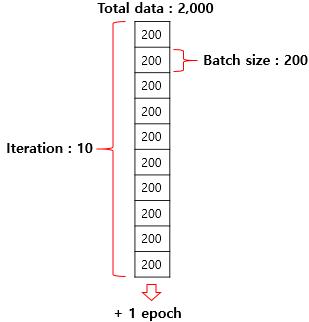

- Iteration :  한번의 epoch 내에서 이루어지는 가중치 W와 b의 업데이트 횟수

### 3. Data Load

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

b_epochs = 100
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        #print(batch_idx)
        #print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
                epoch, nb_epochs, batch_idx+1, len(dataloader),
                cost.item()
                ))

            
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

Epoch    0/2000 Batch 1/3 Cost: 41048.335938
Epoch    0/2000 Batch 2/3 Cost: 9257.376953
Epoch    0/2000 Batch 3/3 Cost: 2121.734131
Epoch  100/2000 Batch 1/3 Cost: 8.109119
Epoch  100/2000 Batch 2/3 Cost: 2.963996
Epoch  100/2000 Batch 3/3 Cost: 6.131624
Epoch  200/2000 Batch 1/3 Cost: 4.611855
Epoch  200/2000 Batch 2/3 Cost: 6.748980
Epoch  200/2000 Batch 3/3 Cost: 3.310427
Epoch  300/2000 Batch 1/3 Cost: 5.949331
Epoch  300/2000 Batch 2/3 Cost: 3.305453
Epoch  300/2000 Batch 3/3 Cost: 9.133333
Epoch  400/2000 Batch 1/3 Cost: 3.790452
Epoch  400/2000 Batch 2/3 Cost: 4.324329
Epoch  400/2000 Batch 3/3 Cost: 2.964233
Epoch  500/2000 Batch 1/3 Cost: 3.770783
Epoch  500/2000 Batch 2/3 Cost: 3.577602
Epoch  500/2000 Batch 3/3 Cost: 3.906558
Epoch  600/2000 Batch 1/3 Cost: 0.686460
Epoch  600/2000 Batch 2/3 Cost: 2.465951
Epoch  600/2000 Batch 3/3 Cost: 7.480562
Epoch  700/2000 Batch 1/3 Cost: 2.384381
Epoch  700/2000 Batch 2/3 Cost: 5.500819
Epoch  700/2000 Batch 3/3 Cost: 0.419067
Epoch 

## 07. Custom Dataset

### 1. Custom Dataset

### 2. 모델 구현

In [71]:
import torch
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset 상속
class CustomDataset(Dataset): 
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
        
    # 총 데이터의 개수를 리턴
    def __len__(self):
        return len(self.x_data)
    
    # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y
    

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

#        if epoch % 100 == 0:
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))


# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

Epoch    0/20 Batch 1/3 Cost: 27929.613281
Epoch    0/20 Batch 2/3 Cost: 8672.939453
Epoch    0/20 Batch 3/3 Cost: 3104.460938
Epoch    1/20 Batch 1/3 Cost: 811.152100
Epoch    1/20 Batch 2/3 Cost: 255.888824
Epoch    1/20 Batch 3/3 Cost: 108.056747
Epoch    2/20 Batch 1/3 Cost: 36.458710
Epoch    2/20 Batch 2/3 Cost: 0.313916
Epoch    2/20 Batch 3/3 Cost: 19.164932
Epoch    3/20 Batch 1/3 Cost: 2.237460
Epoch    3/20 Batch 2/3 Cost: 6.470634
Epoch    3/20 Batch 3/3 Cost: 7.442966
Epoch    4/20 Batch 1/3 Cost: 6.828642
Epoch    4/20 Batch 2/3 Cost: 4.108638
Epoch    4/20 Batch 3/3 Cost: 7.642353
Epoch    5/20 Batch 1/3 Cost: 7.264190
Epoch    5/20 Batch 2/3 Cost: 2.803904
Epoch    5/20 Batch 3/3 Cost: 5.026857
Epoch    6/20 Batch 1/3 Cost: 6.872960
Epoch    6/20 Batch 2/3 Cost: 1.148816
Epoch    6/20 Batch 3/3 Cost: 9.307080
Epoch    7/20 Batch 1/3 Cost: 6.888253
Epoch    7/20 Batch 2/3 Cost: 2.738482
Epoch    7/20 Batch 3/3 Cost: 4.543814
Epoch    8/20 Batch 1/3 Cost: 3.931283
Epoch  